# Week 01 
(b) Write a program to find a local minimum of the function f(θ) = θ^4 -3θ^3 +2. You have to give a value of λ yourself.   
(c) Plot the resulting f(θ) for each iteration.  
(d) Compare your result with the closed form expression of the optimal θ*  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

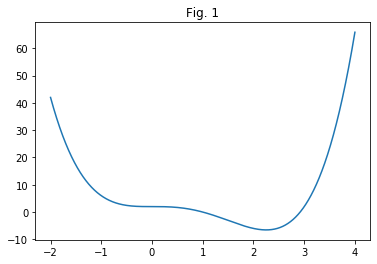

In [2]:
theta = np.arange(-2,4,0.001)
function = theta**4-3*theta**3+2

plt.plot(theta,function)
plt.title('Fig. 1')
plt.show()

In [3]:
current = np.random.uniform(low=-2.0, high=4.0, size=None) 
initial = current
epoch = 10**7
lr = 10**-3
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

In [4]:
#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
    
    #early stopping機制
    if losses[-2]-losses[-1]<epsilon:
        print("early stopping...")
        break
    


early stopping...


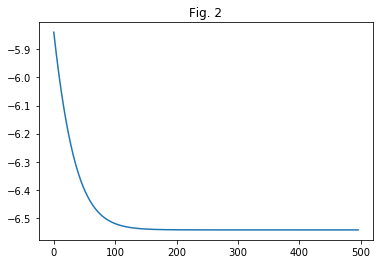

In [5]:
#(c) Plot the resulting f(θ) for each iteration.

plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 2')
plt.show()



In [6]:
#(d) Compare your result with the closed form expression of the optimal θ ? .

print("We start from",initial)
print("After",len(losses),"iterations")
print("We stop at",current)
print("\nWhen the saddle point is",0)
print("And the local optimal is",9/4)

We start from 1.961897941948195
After 497 iterations
We stop at 2.2499849166644172

When the saddle point is 0
And the local optimal is 2.25


## 討論

### early stopping機制：  
每次更新時，loss都會有滿明顯的差異，但如果比較前後兩次的loss沒什麼差異時，就不要把迴圈走完，直接跳出來。

- 如果epoch數量太少，有可能發生欠擬合underfitting（即對於定型資料的學習不夠充分)  Fig. 3-1  
- 如果epoch數量太多，則有可能發生過擬合overfitting（即網路對定型資料中的“雜訊”而非信號擬合）Fig. 3-2  

Early Stopping是避免Overfitting的方法之一。

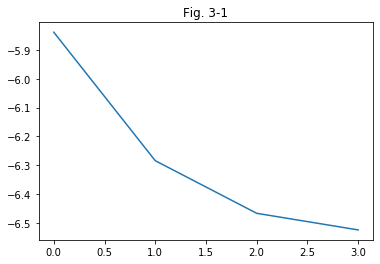

We start from 1.961897941948195
After 4 iterations
We stop at 2.2055880758566166


In [7]:
current = initial
epoch = 3
lr = 10**-3*3*3*3
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
 
        
plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 3-1')
plt.show()


print("We start from",initial)
print("After",len(losses),"iterations")
print("We stop at",current)

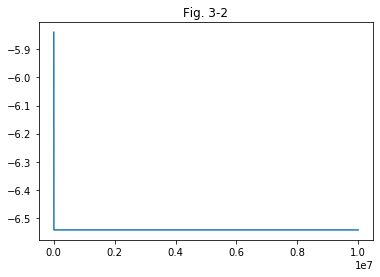

We start from 1.961897941948195
After 10000001 iterations
We stop at 2.25


In [8]:
current = initial
epoch = 10**7
lr = 10**-3*3*3*3
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
 
        
plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 3-2')
plt.show()


print("We start from",initial)
print("After",len(losses),"iterations")
print("We stop at",current)

### Gradient Descent 與 Learning Rate

Gradient descent在正常運作下，應該要能在每一次的iteration下越變越小  
如圖一，已經收斂（完成），其ｆ(θ)不會再下降  

當我們將運行Gradient descent後的每一次ｆ(θ)都製成圖表後，有可能會出現兩種狀況：  
- ｆ(θ)不降反升，如Fig. 4 
- ｆ(θ)上上下下  
而這些狀況都表示需要將learning rate設得更小一點  

當learning rate設的過大時，它乘上原本切線的斜率時將會因為數字過大而造成反效果。所以需要設小一點  

舉例來說  
原本想要把彈珠自然地放在碗公裡，讓彈珠來回滾動，直到動能消失並停滯在最低的碗底  
卻因為碗公太滑(learning rate過大)，導致彈珠根本停不下來（甚至會加速），就這樣越滑越上面  

但也不代表將learning rate設的越小越好  
設的很小，雖然不會有ｆ(θ)不降反升的反效果，但是會造成整個收斂過程極度緩慢，如Fig. 5，需經過原本跌代次數的10倍才會收斂  



early stopping...


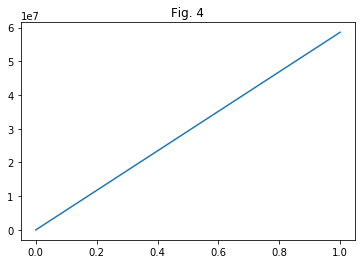

In [9]:
current = initial
epoch = 10**7
lr = 10*-2
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
    
    #early stopping機制
    if losses[-2]-losses[-1]<epsilon:
        print("early stopping...")
        break
        
plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 4')
plt.show()
        

early stopping...


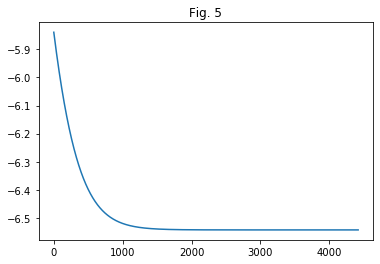

In [10]:
current = initial
epoch = 10**7
lr = 10**-4
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
    
    #early stopping機制
    if losses[-2]-losses[-1]<epsilon:
        print("early stopping...")
        break
        
plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 5')
plt.show()

### 最佳Learning Rate：

- 當learning rate過大，運行完Gradient descent後ｆ(θ)反而會有上升的情況
- 當learning rate過小，會造成Gradient descent運行緩慢

而我們若要得知learning rate的值的話，便需要從0.001, 0.003, 0.01...，持續乘以3來試  
如下，找到最佳learning rate設定值約為10**-3*3*3*3，即約0.027


early stopping...


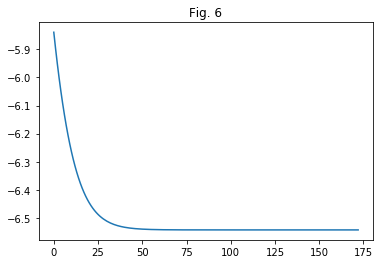

We start from 1.961897941948195
After 173 iterations
We stop at 2.2499918905404153


In [11]:
current = initial
epoch = 10**7
lr = 10**-3*3
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
    
    #early stopping機制
    if losses[-2]-losses[-1]<epsilon:
        print("early stopping...")
        break
        
plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 6')
plt.show()


print("We start from",initial)
print("After",len(losses),"iterations")
print("We stop at",current)

early stopping...


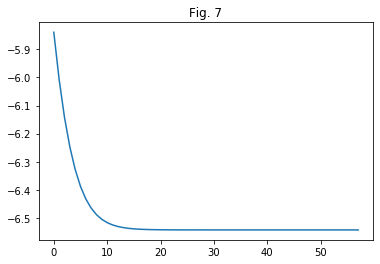

We start from 1.961897941948195
After 58 iterations
We stop at 2.24999574628133


In [12]:
current = initial
epoch = 10**7
lr = 10**-3*3*3
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
    
    #early stopping機制
    if losses[-2]-losses[-1]<epsilon:
        print("early stopping...")
        break
        
plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 7')
plt.show()


print("We start from",initial)
print("After",len(losses),"iterations")
print("We stop at",current)

early stopping...


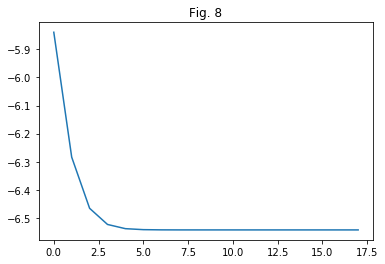

We start from 1.961897941948195
After 18 iterations
We stop at 2.249999251439132


In [13]:
current = initial
epoch = 10**7
lr = 10**-3*3*3*3
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
    
    #early stopping機制
    if losses[-2]-losses[-1]<epsilon:
        print("early stopping...")
        break
        
plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 8')
plt.show()


print("We start from",initial)
print("After",len(losses),"iterations")
print("We stop at",current)

early stopping...


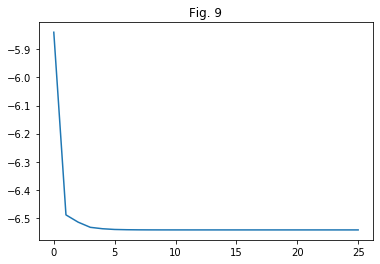

We start from 1.961897941948195
After 26 iterations
We stop at 2.250001702078039


In [14]:
current = initial
epoch = 10**7
lr = 10**-3*3*3*3*3
epsilon = 10**-10
loss = current**4-3*current**3+2
losses = [loss]

#Gradient descent
for i in range(epoch):
    current = current - lr * (4*current**3-9*current**2)
    loss = current**4-3*current**3+2
    losses.append(loss)
    
    
    #early stopping機制
    if losses[-2]-losses[-1]<epsilon:
        print("early stopping...")
        break
        
plt.plot(np.arange(len(losses)),losses)
plt.title('Fig. 9')
plt.show()


print("We start from",initial)
print("After",len(losses),"iterations")
print("We stop at",current)

In [15]:
#最佳lr
10**-3*3*3*3

0.027000000000000003